In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# convert dtype of hp to numeric
df.hp=pd.to_numeric(df.hp,errors='coerce').fillna(0, downcast='infer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


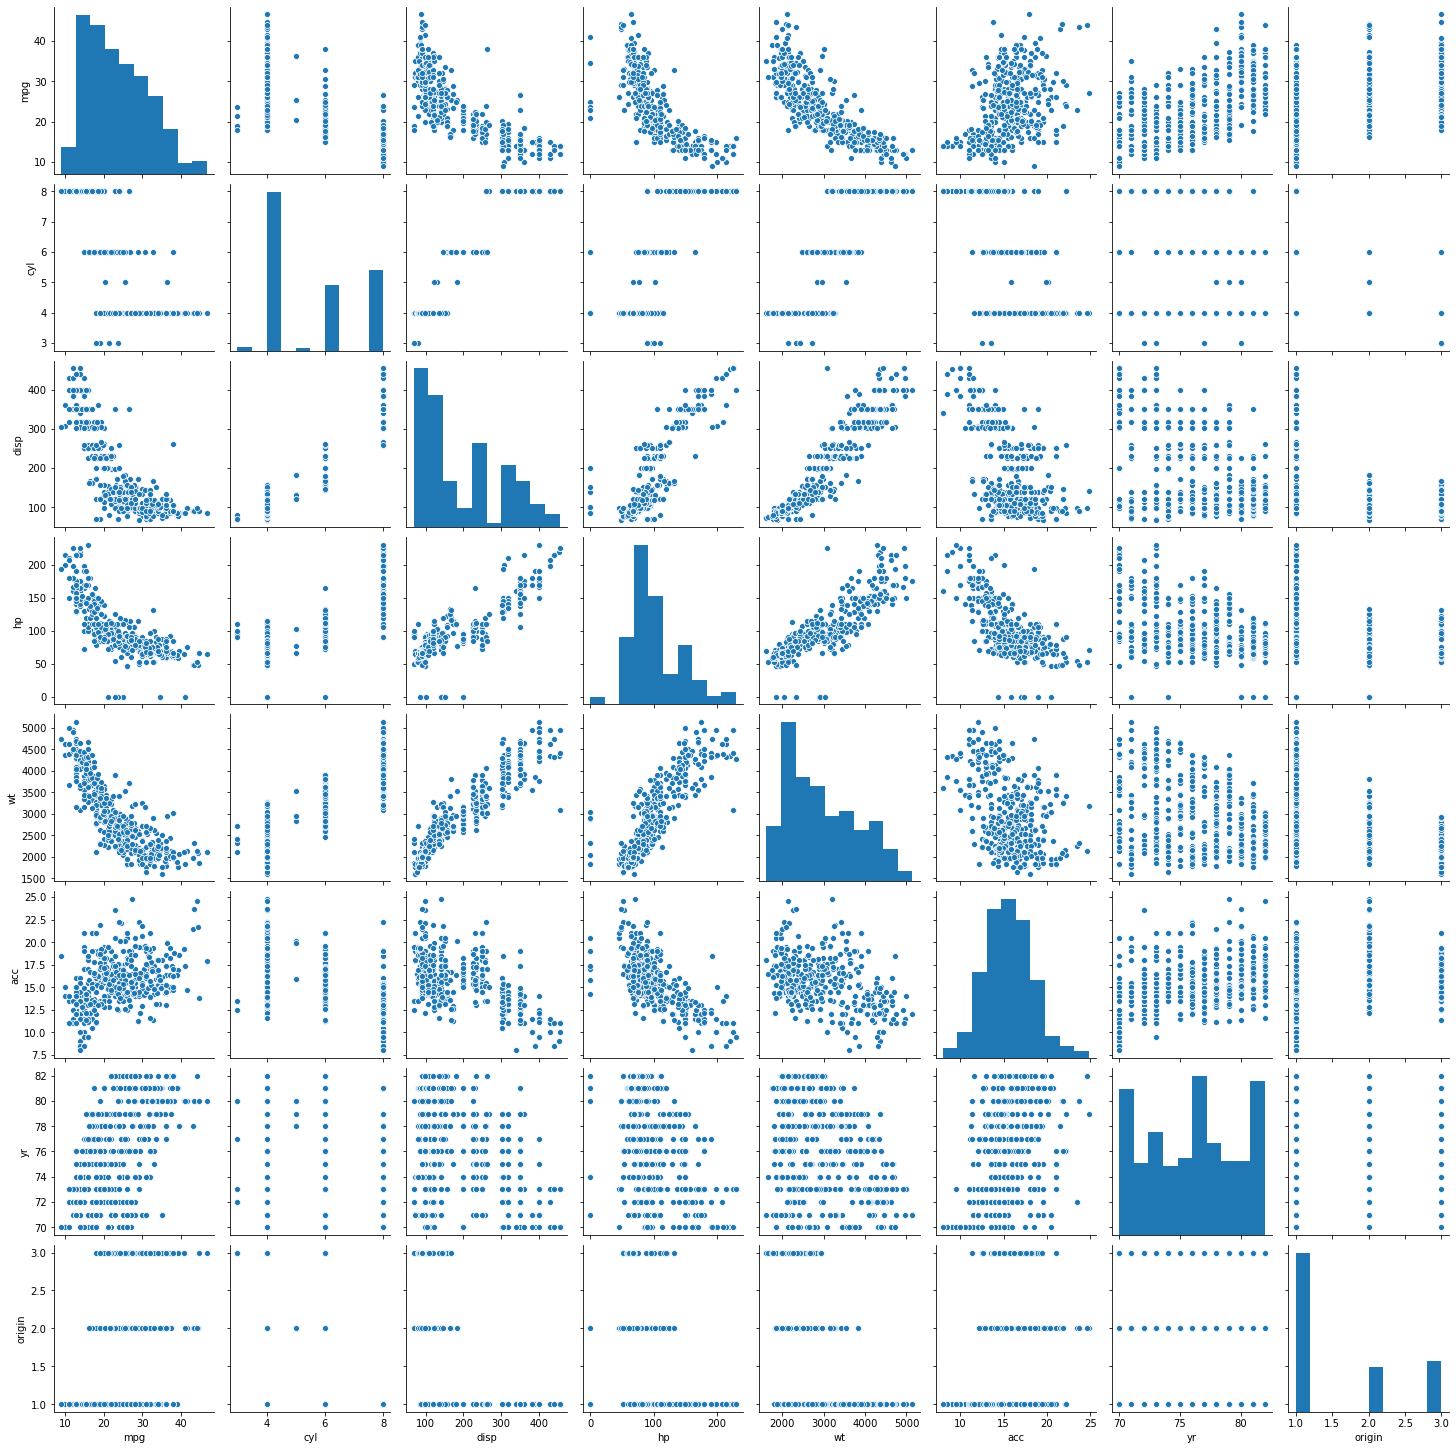

In [10]:
# pair plot
sns.pairplot(df)
plt.show()

Inferences from Pair plot:
1) Acceleration(acc) is following Normal distribution.
2) Disp and WT have linear relationship.
3) mpg and disp are negatively correlated.
4) hp,disp and acc are linearly related.

In [13]:
# onehotencoding 
df1=pd.get_dummies(df,drop_first=True,columns=['yr','origin'])
df1.head(2)

,mpg,cyl,disp,hp,wt,acc,car_name,yr_71,yr_72,yr_73,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,buick skylark 320,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit_transform([['yr','origin']])


<1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [24]:
x=df.drop(['mpg','car_name'],axis=1)
y=df['mpg']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [31]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(278, 7)
(278,)
(120, 7)
(120,)


In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

print('Train Score:',lr.score(x_train,y_train))
print('Test Score:',lr.score(x_test,y_test))
print('No.of non-zero co-efficients:',np.count_nonzero(lr.coef_,0))

Train Score: 0.8084975249757649
Test Score: 0.8463027469482008
No.of non-zero co-efficients: 7


In [32]:
lr.coef_

array([-0.48266373,  0.01724197,  0.00259525, -0.00682688,  0.19788624,
        0.73337302,  1.36214821])

# Regularization Techniques 

In [29]:
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(x_train,y_train)
print('Train Score:',ri.score(x_train,y_train))
print('Test Score:',ri.score(x_test,y_test))
print('No.of non-zero co-efficients:',np.count_nonzero(ri.coef_,0))

Train Score: 0.8084962311695989
Test Score: 0.8462828222333366
No.of non-zero co-efficients: 7


In [30]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
print('Train Score:',ls.score(x_train,y_train))
print('Test Score:',ls.score(x_test,y_test))
print('No.of non-zero co-efficients:',np.count_nonzero(ls.coef_,0))

Train Score: 0.7937902999551802
Test Score: 0.8313577800909089
No.of non-zero co-efficients: 3


# Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
cv5=cross_val_score(lr,x,y,cv=5) 
cv5

array([0.58650554, 0.68562826, 0.82526607, 0.68341873, 0.22426737])

In [34]:
cv10=cross_val_score(lr,x,y,cv=10)
cv10

array([0.70037499, 0.76674889, 0.5913577 , 0.78195655, 0.80968959,
       0.84058019, 0.56334911, 0.75496976, 0.00608045, 0.54793733])

In [35]:
cv5.mean()

0.6010171957674462

In [36]:
cv10.mean()

0.6363044560723872

In [37]:
!pip install PrettyTable

In [40]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Simple LR',0.84,0.85])
x.add_row(['Lasso LR',0.690,0.71])
x.add_row(['Ridge LR',0.84,0.85])

print(x)

+-----------+-------------+------------+
|   Model   | Train Score | Test Score |
+-----------+-------------+------------+
| Simple LR |     0.84    |    0.85    |
|  Lasso LR |     0.69    |    0.71    |
|  Ridge LR |     0.84    |    0.85    |
+-----------+-------------+------------+
